
### Unsupervised Learning Project
#### Done By: Tiffany Watt, Stephanie Austin, Rachel Finlayson, Munyaradzi Dhlakama

<p align="center">
  <img src="anime_1.png" alt="Deforestation (local)" width="800"/>

</p>

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

In [ ]:
!git add Unsupervised_Learning_Project.ipynb
!git commit -m "Updating heading etc"
!git push origin main

[main 6610640] Updating heading etc
 Committer: Tiffany Watt <Tiffany.Watt@ninetyone.com>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 98 insertions(+), 8 deletions(-)


To https://github.com/TiffanyWatt/capstone.git
   af7f797..6610640  main -> main


---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

### 📖 1.1 Introduction  
This project investigates patterns in **insurance claims data** to build a predictive model that detects potential fraud.  
The dataset includes demographic, policy, financial, and incident-related variables, alongside the key outcome variable `fraud_reported`.  
Python-based tools such as `pandas`, `numpy`, `matplotlib`, `seaborn`, and `scikit-learn` are used for cleaning, analysis, visualization, and machine learning.  

---

### 🌍 1.2 Problem Statement  
Insurance fraud is one of the most costly issues in the financial services industry, leading to billions of dollars in losses each year. Detecting fraudulent claims is challenging because:  

- Fraudsters often mimic legitimate claims to avoid detection.  
- Large volumes of claims data make manual investigation impractical.  
- Many influencing factors (e.g., demographics, policy structures, incident details) interact in complex ways.  

This project seeks to address these challenges by applying machine learning to highlight the most significant drivers of fraud and build a model that can accurately flag suspicious claims.  

---

### 🎯 1.3 Objectives  
- Analyze insurance claims data to understand trends and anomalies.  
- Perform **Exploratory Data Analysis (EDA)** to identify relationships between features and fraud outcomes.  
- Build and evaluate multiple machine learning models (e.g., Logistic Regression, Random Forest, Gradient Boosting).  
- Compare model performance using metrics such as **Accuracy, Precision, Recall, F1-score, and ROC-AUC**.  
- Recommend the best-performing model for fraud detection.  
- Provide data-driven insights to support insurers in managing fraud risk more effectively.  

---

### 📊 1.4 Data Source  
The dataset used in this project is an **insurance claims dataset** that provides:  
- Customer demographics, policy information, and financial records.  
- Incident details, claim amounts, and vehicle information.  
- A binary fraud label (`fraud_reported`) indicating whether each claim was identified as fraudulent.  

---

### 🌱 1.5 Importance of the Study  
Fraud detection has both financial and societal importance. Understanding what drives fraudulent behavior helps to:  

- Reduce financial losses for insurance companies.  
- Protect honest policyholders from higher premiums.  
- Improve claims processing efficiency.  
- Strengthen trust in the insurance system.  

---

### ❓ 1.6 Key Questions  
This project aims to answer:  

- Which features are most strongly associated with fraudulent claims?  
- How effectively can machine learning models classify fraudulent vs. non-fraudulent claims?  
- What patterns in customer, policy, or incident data suggest a higher risk of fraud?  
- Which model offers the best balance between precision and recall for fraud detection?  

---

### 🛠️ 1.7 Methodology Overview  
The analysis involves:  
- Importing and exploring the dataset.  
- Cleaning and preparing the data (handling missing values, encoding categorical features, scaling).  
- Performing **EDA** with visualizations and statistical summaries.  
- Training multiple machine learning models.  
- Evaluating models with classification metrics.  
- Summarizing findings and insights for stakeholders.  

---

### 🗂️ 1.8 Notebook Structure  
- Background Context  
- Importing Packages  
- Loading the Dataset  
- Data Cleaning and Preprocessing  
- Exploratory Data Analysis (EDA)  
- Feature Engineering  
- Fraud Modeling (Logistic Regression, Random Forest, Gradient Boosting, etc.)  
- Model Evaluation and Comparison (Accuracy, Precision, Recall, F1, ROC-AUC)  
- Conclusion & Recommendations  
- References  

---

### ✅ 1.9 Expected Outcomes  
- Clear visualizations of fraud vs. non-fraud claims distribution.  
- Identification of the top drivers of fraudulent behavior.  
- Machine learning models trained and compared across key metrics.  
- A recommended fraud detection model that balances accuracy and interpretability.  
- Practical insights for insurers to strengthen fraud prevention strategies.  
---

---
<a href=#one></a>
## **1. Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [120]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

---
<a href=#two></a>
## **2. Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [6]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **3. Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [211]:
# loading dataset
df_insurance = pd.read_csv("insurance_claims_raw.csv")

# Check the first few rows to confirm it loaded correctly
df_insurance.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


### Data Dictionary (Grouped by Category)

#### 1. Customer Demographics
- **months_as_customer**: Number of months the person has been a customer.
- **age**: Age of the insured person.
- **insured_sex**: Sex of the insured person.
- **insured_education_level**: Highest education level achieved.
- **insured_occupation**: Occupation of the insured person.
- **insured_hobbies**: Reported hobbies.
- **insured_relationship**: Marital or relationship status.
- **insured_zip**: ZIP/postal code of the insured.

#### 2. Policy Information
- **policy_number**: Unique identifier for the insurance policy.
- **policy_bind_date**: Date when the policy was bound (activated).
- **policy_state**: State in which the policy was issued.
- **policy_csl**: Combined single limit of liability coverage.
- **policy_deductable**: Deductible amount chosen by the policyholder.
- **policy_annual_premium**: Annual premium paid by the policyholder.
- **umbrella_limit**: Maximum additional liability coverage under an umbrella policy.

#### 3. Financial Information
- **capital_gains**: Income from capital gains (stocks, real estate, etc.).
- **capital_loss**: Reported capital losses (should not be negative).

#### 4. Incident Details
- **incident_date**: Date when the incident occurred.
- **incident_hour_of_the_day**: Hour (0–23) of the incident.
- **incident_type**: Type of incident (e.g., multi-vehicle collision, theft).
- **collision_type**: Type of collision (rear-end, side-impact, unknown).
- **incident_severity**: Severity of the incident (minor, major, total loss).
- **incident_state**: State where the incident happened.
- **incident_city**: City where the incident happened.
- **incident_location**: Address or location of the incident.
- **number_of_vehicles_involved**: How many vehicles were involved.
- **property_damage**: Whether there was property damage (YES/NO).
- **bodily_injuries**: Number of bodily injuries.
- **witnesses**: Number of witnesses present.
- **authorities_contacted**: Authority contacted (police, fire, ambulance, none).
- **police_report_available**: Whether a police report was filed.

#### 5. Claims
- **injury_claim**: Amount claimed for injuries.
- **property_claim**: Amount claimed for property damage.
- **vehicle_claim**: Amount claimed for vehicle damage.
- **total_claim_amount**: Total amount claimed (sum of the above three).

#### 6. Vehicle Information
- **auto_make**: Vehicle make (e.g., Toyota, Ford).
- **auto_model**: Vehicle model (e.g., Camry, Accord).
- **auto_year**: Year of the vehicle.

#### 7. Fraud
- **fraud_reported**: Whether the claim was flagged as fraudulent (Y/N).

---
<a href=#four></a>
## **4. Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

> <span style="color:blue; font-weight:bold">
Important: First we copy the data to a new dataframe to ensure that we don’t override the raw data
</span>

In [212]:
# The copy of the dataframe
df_insurance_copy = df_insurance.copy()

In [213]:
df_insurance_copy.shape

(1000, 40)

### 4.1 Column Name Cleaning

Update all column names in the dataframe `df_insurance_copy` so they are easier to work with in Python.

- Replaced **spaces** `" "` with underscores `_`
- Replaced **hyphens** `"-"` with underscores `_`

This ensures that all column names are consistent and Python-friendly (e.g., `"policy annual premium"` → `policy_annual_premium`, `"capital-loss"` → `capital_loss`).


In [214]:
# Replace spaces, blanks, and hyphens with underscores
df_insurance_copy.columns = (
    df_insurance_copy.columns
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

# Confirm changes
print(df_insurance_copy.columns.tolist())

['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital_gains', 'capital_loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported', '_c39']


### 4.2 Missing Data Handling and Rationale

1. **Removed fully empty column**
   - Dropped `_c39` since it contained only `NaN`.
   - *Why*: Keeping a column with no information adds noise and no analytical value.

2. **Component claims**
   - Replaced `NaN` in `injury_claim`, `property_claim`, and `vehicle_claim` with `0`.
   - Recalculated `total_claim_amount` as the sum of the three if it was missing.
   - *Why*: A missing claim value realistically means no claim was filed, so `0` is the correct representation. Total claims should always equal the sum of components.

3. **Policy data**
   - Filled `NaN` in `policy_annual_premium` with the median premium.
   - Filled `NaN` in `policy_deductable` with the median deductible.
   - *Why*: The median is less sensitive to outliers and reflects a typical policyholder. Since only a few values were missing, this preserves overall distribution without bias.

4. **Age**
   - Updated missing `Age` values to the median age of customers grouped by `months_as_customers` in the bands (0–100, 100–200, 200–300, 300+)
   - *Why*: Imputing with the mode (most common value) avoids creating artificial categories and keeps distributions realistic.

5. **Education**
   - Updated missing `insured_education_level` values to `"College"`, the most frequent level where `insured_occupation` was `"prof-specialty"`.
   - *Why*: Education level is closely linked to occupation. By imputing with the most common education level within the same occupation group, we preserve realistic relationships in the data and avoid introducing bias by using a generic default.

6. **Police reports & authorities**
   - Replaced `?` in `police_report_available` with `"NO"`.
   - Filled missing values in `authorities_contacted` with `"NO"`.
   - *Why*: A missing or unknown police report/contact usually means no authority was involved. Defaulting to `"NO"` is a conservative assumption.

7. **Financial fields**
   - Set missing `capital_gains` values to `0`.
   - *Why*: Capital gains should not be missing in this dataset’s context. Treating them as `0` is consistent with “no reportable gain”, and `0` is th emost frequest result

8. **Hobbies**
   - Replaced missing (`NaN`) and `?` in `insured_hobbies` with `"None"`.
   - *Why*: Absence of a reported hobby is best expressed as `"None"`. This avoids losing rows and ensures the field is consistent.

9. **Property damage**
   - Updated `property_damage` to `"YES"` if `property_claim > 0`, else `"NO"`.
   - *Why*: The claim amount directly reflects whether property damage occurred, making this rule logical and data-driven.

10. **Collision type**
   - Replaced `?` with `"Unknown"` if `vehicle_claim > 0`.
   - Replaced `?` with `"None"` if `vehicle_claim == 0`.
   - *Why*: If a vehicle claim exists but type is unknown, `"Unknown"` is accurate. If no claim exists, `"None"` avoids misclassifying the data.

In [215]:
df_insurance_copy = df_insurance_copy.drop(columns=["_c39"])

In [216]:
# Replace "?" with "NO" in police_report_available
df_insurance_copy["police_report_available"] = (
    df_insurance_copy["police_report_available"].replace("?", "NO")
)


In [217]:
# Replace NaN with "NO" in authorities_contacted
df_insurance_copy["authorities_contacted"] = (
    df_insurance_copy["authorities_contacted"].fillna("NO")
)

In [218]:
# Only look at rows where total_claim_amount is not NaN
df_non_null = df_insurance_copy.dropna(subset=["total_claim_amount"]).copy()

# Calculate the sum of the component claims
df_non_null["claims_sum"] = (
    df_non_null["injury_claim"].fillna(0) +
    df_non_null["property_claim"].fillna(0) +
    df_non_null["vehicle_claim"].fillna(0)
)

# Compare with total_claim_amount
matches = (df_non_null["total_claim_amount"] == df_non_null["claims_sum"])
print("Matches:", matches.sum())
print("Mismatches:", (~matches).sum())

# Show a few mismatches for inspection
df_non_null.loc[~matches, ["total_claim_amount", "injury_claim", "property_claim", "vehicle_claim", "claims_sum"]].head()

Matches: 994
Mismatches: 2


,total_claim_amount,injury_claim,property_claim,vehicle_claim,claims_sum
469,53190.0,NaN,11820.0,35460,47280.0
554,41700.0,8340.0,NaN,25020,33360.0


In [219]:
# Replace NaN in component claims with 0
df_insurance_copy["injury_claim"] = df_insurance_copy["injury_claim"].fillna(0)
df_insurance_copy["property_claim"] = df_insurance_copy["property_claim"].fillna(0)
df_insurance_copy["vehicle_claim"] = df_insurance_copy["vehicle_claim"].fillna(0)

# If total_claim_amount is NaN, update it to the sum of the three components
df_insurance_copy["total_claim_amount"] = df_insurance_copy["total_claim_amount"].fillna(
    df_insurance_copy["injury_claim"] +
    df_insurance_copy["property_claim"] +
    df_insurance_copy["vehicle_claim"]
)

In [220]:
# Fill NaN values with median
df_insurance_copy["policy_annual_premium"].fillna(
    df_insurance_copy["policy_annual_premium"].median(),
    inplace=True
)

df_insurance_copy["policy_deductable"].fillna(
    df_insurance_copy["policy_deductable"].median(),
    inplace=True
)

In [221]:
# Fill NaN values in insured_education_level with "College"
df_insurance_copy["insured_education_level"] = (
    df_insurance_copy["insured_education_level"].fillna("College")
)


In [222]:
# Define the bands
bins = [0, 100, 200, 300, df_insurance_copy["months_as_customer"].max()]
labels = ["0-100", "100-200", "200-300", "300+"]

# Create a new column with the band each row belongs to
df_insurance_copy["months_band"] = pd.cut(
    df_insurance_copy["months_as_customer"],
    bins=bins,
    labels=labels,
    right=False
)

# Calculate median ages for each band (ignoring NaN ages)
band_medians = df_insurance_copy.groupby("months_band")["age"].median()
print("Median ages per band:\n", band_medians, "\n")

# Fill NaN ages with the median for their band
def fill_age(row):
    if pd.isna(row["age"]):
        return band_medians[row["months_band"]]
    else:
        return row["age"]

df_insurance_copy["age"] = df_insurance_copy.apply(fill_age, axis=1)

# Drop the helper column if it exists
if "months_band" in df_insurance_copy.columns:
    df_insurance_copy = df_insurance_copy.drop(columns=["months_band"])

Median ages per band:
 months_band
0-100      29.0
100-200    33.0
200-300    42.0
300+       54.0
Name: age, dtype: float64 



In [223]:
# Step 1: Find most frequent state for each city
most_frequent_state = (
    df_insurance_copy.groupby("incident_city")["incident_state"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

print("Most frequent state per city:")
print(most_frequent_state)

# Step 2: Fill missing incident_state with most frequent state of that city
def fill_state(row):
    if pd.isna(row["incident_state"]):
        return most_frequent_state[row["incident_city"]]
    return row["incident_state"]

df_insurance_copy["incident_state"] = df_insurance_copy.apply(fill_state, axis=1)

Most frequent state per city:
incident_city
Arlington      NY
Columbus       NY
Hillsdale      NY
Northbend      SC
Northbrook     NY
Riverwood      NY
Springfield    NY
Name: incident_state, dtype: object


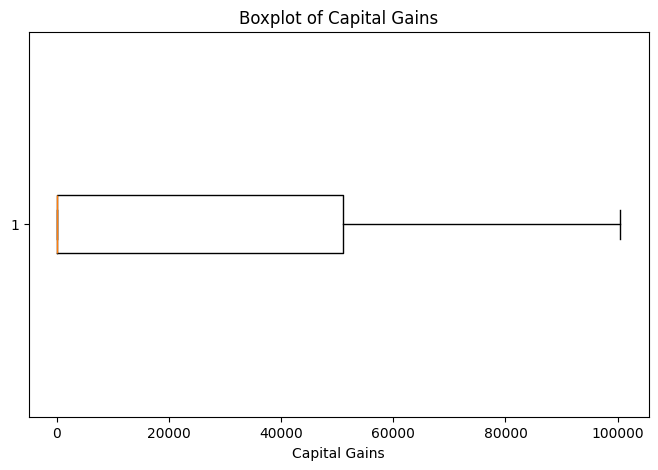

In [224]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.boxplot(df_insurance_copy["capital_gains"].dropna(), vert=False)

plt.title("Boxplot of Capital Gains")
plt.xlabel("Capital Gains")
plt.show()

In [225]:
# Replace NaN with 0 in capital-gains
df_insurance_copy["capital_gains"] = df_insurance_copy["capital_gains"].fillna(0)

In [226]:
# Replace NaN and "?" with "None" in insured_hobbies
df_insurance_copy["insured_hobbies"] = (
    df_insurance_copy["insured_hobbies"]
    .fillna("None")   # handle NaN
    .replace("?", "None")  # handle "?"
)

In [227]:
# Distinct values in collision_type
print("Distinct values in collision_type:")
print(df_insurance_copy["collision_type"].unique())

# Distinct values in property_damage
print("\nDistinct values in property_damage:")
print(df_insurance_copy["property_damage"].unique())

Distinct values in collision_type:
['Side Collision' '?' 'Rear Collision' 'Front Collision']

Distinct values in property_damage:
['YES' '?' 'NO']


In [228]:
# Show vehicle_claim values where collision_type is "?"
vehicle_claim_unknown = df_insurance_copy.loc[
    df_insurance_copy["collision_type"] == "?",
    ["collision_type", "vehicle_claim"]
]

print(f"Number of rows with collision_type = '?': {len(vehicle_claim_unknown)}")
print(vehicle_claim_unknown.head(10))  # preview first 10

Number of rows with collision_type = '?': 178
   collision_type  vehicle_claim
1               ?           3510
4               ?           4550
13              ?           5040
26              ?           6560
27              ?           4160
37              ?           3280
48              ?           5670
51              ?           5280
52              ?           3440
54              ?           1680


In [229]:
# Update collision_type based on conditions
df_insurance_copy["collision_type"] = df_insurance_copy.apply(
    lambda row: "Unknown" if row["collision_type"] == "?" and row["vehicle_claim"] > 0
    else ("None" if row["collision_type"] == "?" and row["vehicle_claim"] == 0 else row["collision_type"]),
    axis=1
)

In [230]:
# Show property_claim values where property_damage is "?"
property_claim_unknown = df_insurance_copy.loc[
    df_insurance_copy["property_damage"] == "?",
    ["property_damage", "property_claim"]
]

print(f"Number of rows with property_damage = '?': {len(property_claim_unknown)}")
print(property_claim_unknown.head(10))  # preview first 10

Number of rows with property_damage = '?': 360
   property_damage  property_claim
1                ?           780.0
3                ?          6340.0
6                ?          7150.0
7                ?          9380.0
16               ?          5790.0
19               ?          6040.0
21               ?          4730.0
23               ?         16360.0
36               ?          6020.0
38               ?          6230.0


In [231]:
# Update property_damage based on property_claim values
df_insurance_copy["property_damage"] = df_insurance_copy["property_claim"].apply(
    lambda x: "YES" if x > 0 else "NO"
)


In [232]:
# % missing values per column
missing_cols = (df_insurance_copy.isnull().mean() * 100).sort_values(ascending=False)
print("Missing values per column (%):")
print(missing_cols)



Missing values per column (%):
months_as_customer             0.0
age                            0.0
policy_number                  0.0
policy_bind_date               0.0
policy_state                   0.0
policy_csl                     0.0
policy_deductable              0.0
policy_annual_premium          0.0
umbrella_limit                 0.0
insured_zip                    0.0
insured_sex                    0.0
insured_education_level        0.0
insured_occupation             0.0
insured_hobbies                0.0
insured_relationship           0.0
capital_gains                  0.0
capital_loss                   0.0
incident_date                  0.0
incident_type                  0.0
collision_type                 0.0
incident_severity              0.0
authorities_contacted          0.0
incident_state                 0.0
incident_city                  0.0
incident_location              0.0
incident_hour_of_the_day       0.0
number_of_vehicles_involved    0.0
property_damage         

In [233]:
# Count of "?" per column
q_counts = (df_insurance_copy == "?").sum()
q_counts = q_counts[q_counts > 0]

print("Number of '?' values per column:")
print(q_counts)

Number of '?' values per column:
Series([], dtype: int64)


### 4.3 5 number summary

#### Role of the Five-Number Summary in Data Cleaning

The five-number summary (minimum, Q1, median, Q3, maximum) is a quick way to understand the distribution of numeric fields and plays an important role in data cleaning:

1. **Detect impossible values**
   - Example: `umbrella_limit` had a value like `-1,000,000` which is not possible. The five-number summary made these extremes visible immediately.

2. **Spot outliers**
   - Example: `capital_loss` showed negative values (e.g., `-111,100`), which are invalid for a “loss” field. Identifying these helps decide whether to replace them with `0` or drop them.

3. **Guide imputations**
   - The median is revealed directly in the summary and is often used to fill missing values because it’s robust to outliers. For instance, missing ages were filled using the band-specific median.

4. **Support filtering rules**
   - If the min and max are far outside typical ranges, those rows can be flagged for further review or capped. The summary provides the boundaries for boxplots and outlier detection.

In short, the five-number summary gives both a **diagnostic view of data quality** and a **foundation for cleaning decisions** such as imputations, outlier corrections, and validation of ranges.


In [234]:
# Five-number summary for all numeric columns
five_num_summary = df_insurance_copy.describe().T[["min", "25%", "50%", "75%", "max"]]
print(five_num_summary)

                                    min          25%        50%         75%  \
months_as_customer                 0.00     115.7500     199.50     276.250   
age                               19.00      32.0000      38.00      44.000   
policy_number                 100804.00  335980.2500  533135.00  759099.750   
policy_deductable                500.00     500.0000    1000.00    2000.000   
policy_annual_premium            433.33    1090.5675    1257.83    1415.695   
umbrella_limit              -1000000.00       0.0000       0.00       0.000   
insured_zip                   430104.00  448404.5000  466445.50  603251.000   
capital_gains                      0.00       0.0000       0.00   51025.000   
capital_loss                 -111100.00  -51500.0000  -23250.00       0.000   
incident_hour_of_the_day           0.00       6.0000      12.00      17.000   
number_of_vehicles_involved        1.00       1.0000       1.00       3.000   
bodily_injuries                    0.00       0.0000

In [235]:
# Make umbrella_limit absolute (convert negatives to positive)
df_insurance_copy["umbrella_limit"] = df_insurance_copy["umbrella_limit"].abs()

In [236]:
# Convert capital_loss to absolute values
df_insurance_copy["capital_loss"] = df_insurance_copy["capital_loss"].abs()

### 4.4 Feature Engineering

1. **Binding Numeric Data**
   - Example: `umbrella_limit` had a value like `-1,000,000` which is not possible. The five-number summary made these extremes visible immediately.



In [237]:
df_insurance_copy.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,0,NO,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,2,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,1,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N


---
<a href=#five></a>
## **5. Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

Before visualising the data, it's helpful to first understand its structure and completeness. The following Pandas methods are useful:


- **`.info()`** – Summarises column names, data types, and non-null counts  
- **`.describe()`** – Provides summary statistics for numerical columns (mean, min, max, etc.)  
- **`.nunique()` / `.unique()`** – Shows the number of unique values (e.g. countries, years)  
- **`.isna().sum()`** – Counts missing values in each column to identify data gaps
---


In [238]:
# Shape - Returns the number of rows and columns in the dataset  
df_insurance_copy.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   float64
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   float64
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [239]:
df_insurance_copy["policy_bind_date"] = pd.to_datetime(df_insurance_copy["policy_bind_date"], errors="coerce")
df_insurance_copy["incident_date"] = pd.to_datetime(df_insurance_copy["incident_date"], errors="coerce")

In [240]:
df_insurance_copy["age"] = df_insurance_copy["age"].astype("Int64")  # nullable integer

### 5.1 Fraud Detection EDA

#### 1. Class Balance
- Checked the distribution of fraud vs. non-fraud cases using bar plots.
- Purpose: ensure class balance is understood before modeling.

#### 2. Fraud by Policy Features
- Compared fraud vs. non-fraud across:
  - **Annual Premiums** (boxplots)
  - **Policy Deductibles** (countplots)
- Purpose: see if policy cost/coverage relates to likelihood of fraud.

#### 3. Fraud by Customer Demographics
- Explored fraud patterns across:
  - **Age distribution** (histogram with fraud overlay)
  - **Education level** (countplot)
  - **Occupation** (countplot, ordered by frequency)
- Purpose: identify demographic groups with higher fraud incidence.

#### 4. Fraud by Incident Details
- Examined fraud frequency across:
  - **Incident type** (vehicle theft, multi-vehicle collision, etc.)
  - **Incident severity** (minor damage, major damage, total loss)
  - **Authorities contacted** (police, fire, ambulance, none)
- Purpose: evaluate whether incident descriptions correlate with fraud.

#### 5. Fraud by Claims
- Compared fraud vs. non-fraud for:
  - **Injury claim amounts**
  - **Property claim amounts**
  - **Vehicle claim amounts**
- Purpose: detect whether claim sizes differ systematically for fraud cases.

#### 6. Correlation with Fraud Flag
- Created a binary variable (`fraud_flag`: Y=1, N=0).
- Generated a correlation heatmap with numeric fields (e.g., premiums, claims, umbrella limits).
- Purpose: identify numeric features most associated with fraud.

#### 6. Fraud by State
- Created a map in browser showing % Fraud per State
- Purpose: Identify if there are any incident states with higher fraud cases

---

### Insights Enabled by This EDA
- Understand **fraud prevalence** in the dataset.
- Identify **policyholder traits** (e.g., occupation, education) linked to higher fraud risk.
- Spot **incident types and severities** more prone to fraud.
- Quantify how **claim amounts** differ between fraud and non-fraud.
- Highlight **numeric features** with the strongest predictive power for fraud.

This analysis builds the foundation for targeted fraud detection modeling.

#### 1. Class Balance
- Fraud (`Y`) accounts for **~25%** of cases (247 out of 1000).
- Non-fraud (`N`) dominates with **~75%** of cases.
- Dataset is moderately imbalanced but still usable for modeling.

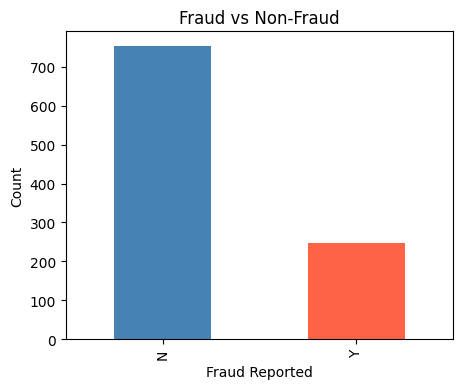

fraud_reported
N    753
Y    247
Name: count, dtype: int64


In [241]:
import matplotlib.pyplot as plt

fraud_counts = df_insurance_copy["fraud_reported"].value_counts()

plt.figure(figsize=(5,4))
fraud_counts.plot(kind="bar", color=["steelblue", "tomato"])
plt.title("Fraud vs Non-Fraud")
plt.xlabel("Fraud Reported")
plt.ylabel("Count")
plt.show()

print(fraud_counts)

#### 2. Policy Features
- **Annual Premiums**: No significant difference in distribution between fraud and non-fraud. Both groups have similar medians (~1250) with some outliers at the high end.
- **Deductibles**: Fraud is present across all deductible levels (500, 1000, 2000). No obvious deductible category strongly associated with fraud.


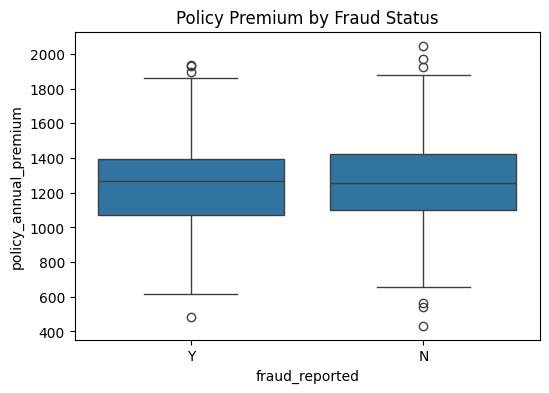

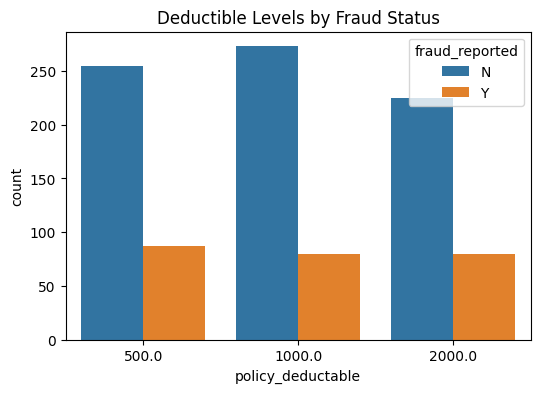

In [242]:
import seaborn as sns

# Boxplot: Annual Premium
plt.figure(figsize=(6,4))
sns.boxplot(x="fraud_reported", y="policy_annual_premium", data=df_insurance_copy)
plt.title("Policy Premium by Fraud Status")
plt.show()

# Deductible
plt.figure(figsize=(6,4))
sns.countplot(x="policy_deductable", hue="fraud_reported", data=df_insurance_copy)
plt.title("Deductible Levels by Fraud Status")
plt.show()

#### 3. Customer Demographics
- **Age**: Fraud cases appear more concentrated between ages 30–40 compared to non-fraud.
- **Education (fraud % per group)**:
  - **PhD and MD** show the highest fraud proportions relative to their group size.
  - Fraud risk is disproportionately higher in smaller education categories like PhD and MD, even though their total number of cases is lower.
 
- **Occupation (fraud % per group)**:
  - Highest relative fraud proportions: Exec-managerial, Farming-fishing, Craft-repair, Transport-moving, Sales, Tech-support.
  - Lowest relative fraud proportions: Other-service, Private-house-serv, Admin-clerical.
  - Insight: While large groups like Machine-op-inspct and Sales produce many fraud cases in raw counts, proportional fraud risk is actually higher among smaller groups like Exec-managerial and Farming-fishing.


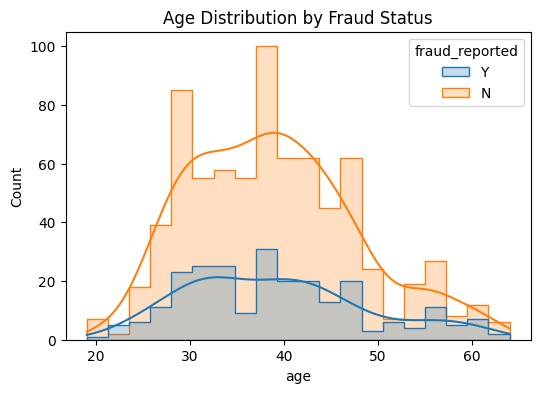

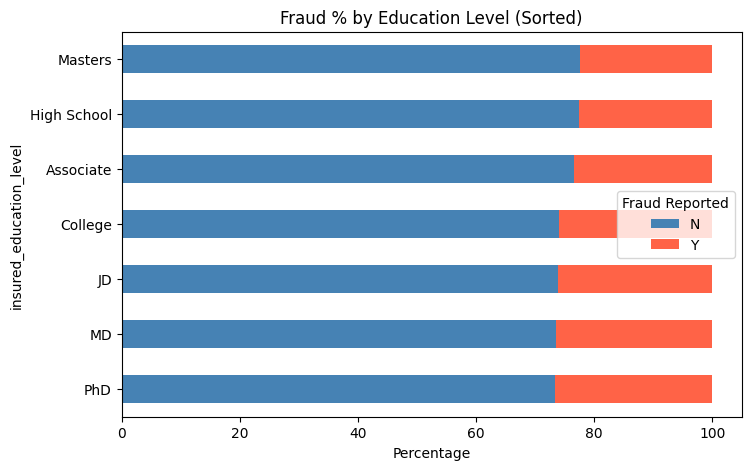

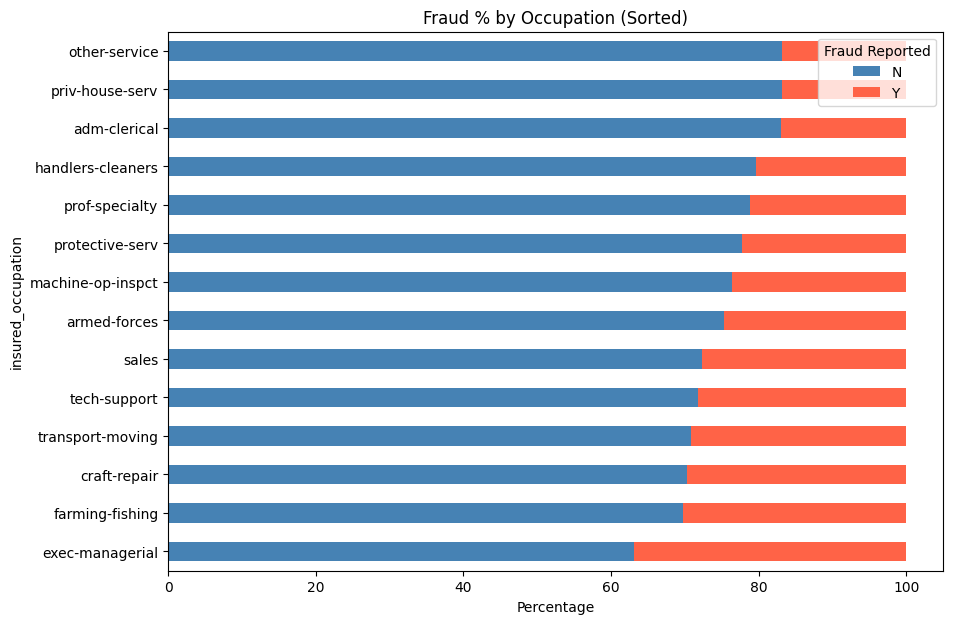

In [243]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(data=df_insurance_copy, x="age", hue="fraud_reported", bins=20, kde=True, element="step")
plt.title("Age Distribution by Fraud Status")
plt.show()

# --- Education Fraud % ---
edu_pct = (
    df_insurance_copy.groupby("insured_education_level")["fraud_reported"]
    .value_counts(normalize=True)
    .rename("percentage")
    .mul(100)
    .reset_index()
)

edu_pivot = edu_pct.pivot(index="insured_education_level", columns="fraud_reported", values="percentage")

# Sort by fraud % (Y) descending
edu_pivot = edu_pivot.sort_values(by="Y", ascending=False)

# Plot
edu_pivot.plot(kind="barh", stacked=True, figsize=(8,5), color=["steelblue","tomato"])
plt.title("Fraud % by Education Level (Sorted)")
plt.xlabel("Percentage")
plt.legend(title="Fraud Reported")
plt.show()


# --- Occupation Fraud % ---
occ_pct = (
    df_insurance_copy.groupby("insured_occupation")["fraud_reported"]
    .value_counts(normalize=True)
    .rename("percentage")
    .mul(100)
    .reset_index()
)

occ_pivot = occ_pct.pivot(index="insured_occupation", columns="fraud_reported", values="percentage")

# Sort by fraud % (Y) descending
occ_pivot = occ_pivot.sort_values(by="Y", ascending=False)

# Plot
occ_pivot.plot(kind="barh", stacked=True, figsize=(10,7), color=["steelblue","tomato"])
plt.title("Fraud % by Occupation (Sorted)")
plt.xlabel("Percentage")
plt.legend(title="Fraud Reported")
plt.show()

### 4. Incident Details
- **Incident Type**:
  - Fraud more common in **multi-vehicle and single-vehicle collisions**.
  - Vehicle theft and parked car incidents show fewer fraud cases.
- **Incident Severity**:
  - Fraud overrepresented in **major damage** claims.
  - Non-fraud dominates **minor damage** and **total loss** categories.
- **Authorities Contacted**:
  - Fraud more likely when **authorities were involved** (Police, Fire, Ambulance, Other).
  - Non-fraud dominates the “No authorities contacted” group.

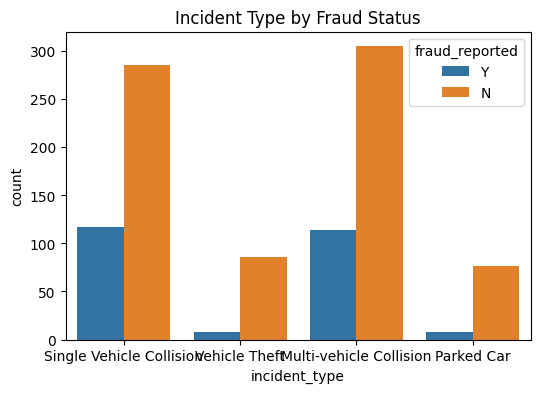

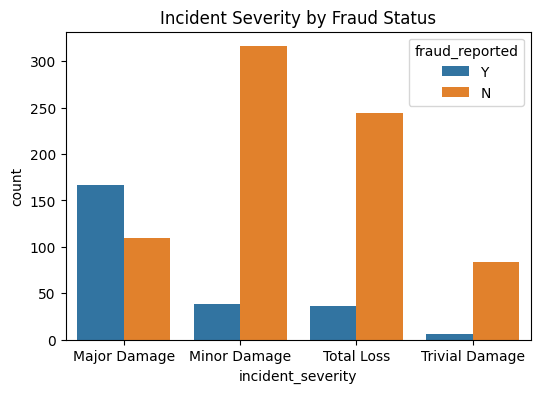

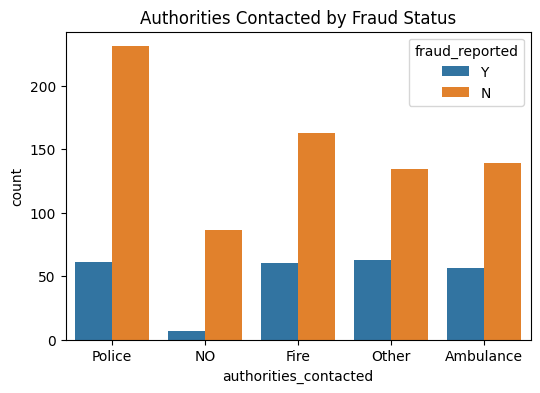

In [244]:
# Incident type
plt.figure(figsize=(6,4))
sns.countplot(x="incident_type", hue="fraud_reported", data=df_insurance_copy)
plt.title("Incident Type by Fraud Status")
plt.show()

# Incident severity
plt.figure(figsize=(6,4))
sns.countplot(x="incident_severity", hue="fraud_reported", data=df_insurance_copy)
plt.title("Incident Severity by Fraud Status")
plt.show()

# Authorities contacted
plt.figure(figsize=(6,4))
sns.countplot(x="authorities_contacted", hue="fraud_reported", data=df_insurance_copy)
plt.title("Authorities Contacted by Fraud Status")
plt.show()

### 5. Claims
- Fraudulent claims generally involve **higher amounts**:
  - Injury claims: higher median for fraud.
  - Property claims: slightly higher medians for fraud with more extreme outliers.
  - Vehicle claims: higher medians and more variability in fraud cases.
- Outliers exist in both fraud and non-fraud groups, but fraud distributions lean higher.

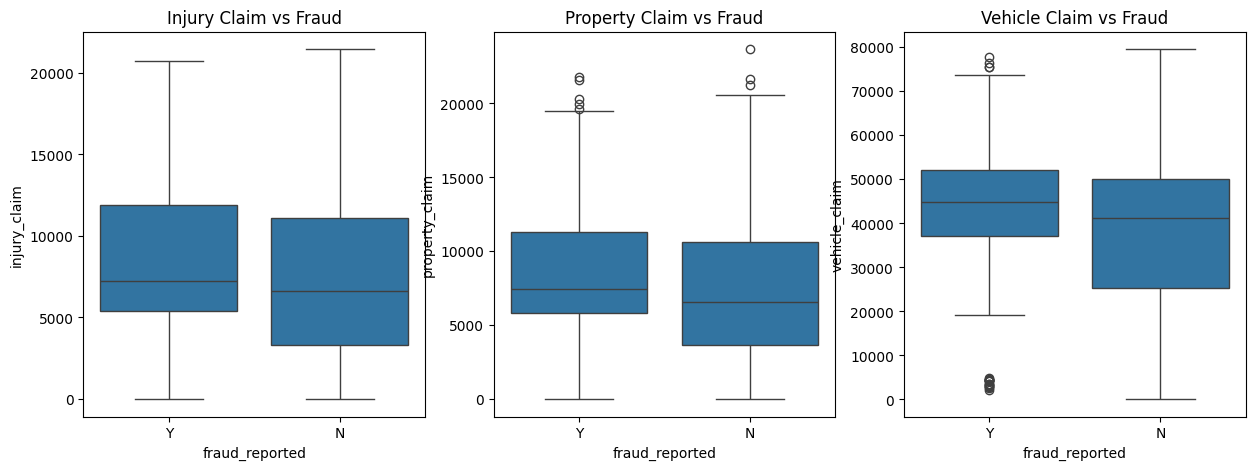

In [245]:
# Distribution of claim amounts
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x="fraud_reported", y="injury_claim", data=df_insurance_copy, ax=axes[0])
sns.boxplot(x="fraud_reported", y="property_claim", data=df_insurance_copy, ax=axes[1])
sns.boxplot(x="fraud_reported", y="vehicle_claim", data=df_insurance_copy, ax=axes[2])
axes[0].set_title("Injury Claim vs Fraud")
axes[1].set_title("Property Claim vs Fraud")
axes[2].set_title("Vehicle Claim vs Fraud")
plt.show()

### 6. Correlations
- Claim-related fields (`injury_claim`, `property_claim`, `vehicle_claim`) are highly correlated with `total_claim_amount` (expected).
- `fraud_flag` shows only **weak numeric correlations** with individual features.
- Suggests fraud is driven more by **categorical/behavioral factors** (e.g., incident type, occupation, education) than raw numeric values.

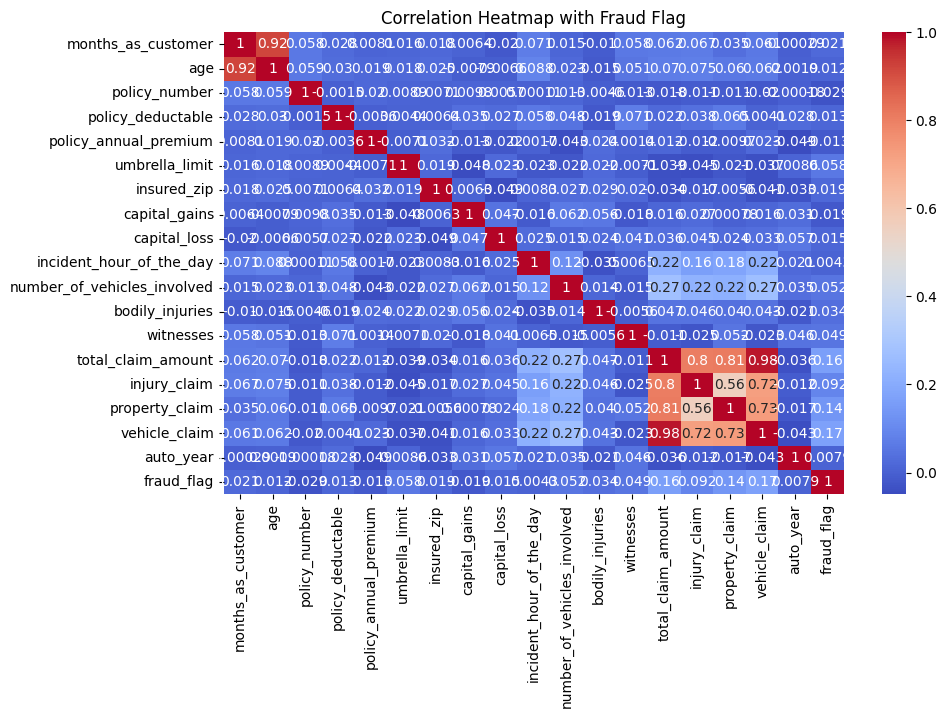

In [246]:
df_corr = df_insurance_copy.copy()
df_corr["fraud_flag"] = df_corr["fraud_reported"].map({"Y":1, "N":0})

plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap with Fraud Flag")
plt.show()

### 6. Fraud per State
- Highest Fraud in OH State

In [247]:
import plotly.io as pio
pio.renderers.default = "browser"   # avoids Jupyter renderers
fig.show()

In [248]:
import pandas as pd
import plotly.express as px

df_insurance_copy["fraud_flag"] = df_insurance_copy["fraud_reported"].map({"Y":1,"N":0})

fraud_by_state = (
    df_insurance_copy.groupby("incident_state")["fraud_flag"]
    .mean().mul(100).reset_index()
    .rename(columns={"fraud_flag":"fraud_rate"})
)

fig = px.choropleth(
    fraud_by_state,
    locations="incident_state",
    locationmode="USA-states",
    color="fraud_rate",
    scope="usa",
    color_continuous_scale="Reds",
    labels={"fraud_rate":"Fraud Rate (%)"},
    title="Fraud Rate by Incident State"
)
fig.show()

## 📌 Overall Insights
- **Fraud prevalence**: About 1 in 4 claims is fraudulent — enough data to model but requires imbalance handling.
- **Policy features** like premiums and deductibles are weak predictors of fraud.
- **Demographics**: Fraud risk is proportionally higher for Masters/High School education levels and for occupations like Other-service and Admin-clerical.
- **Incidents**: Fraud is more likely when incidents are severe and when authorities are contacted.
- **Claims**: Fraudulent claims tend to have **larger amounts** across all claim categories.
- **Modeling implication**: Fraud detection will rely more on categorical features (incident, demographics, authority involvement) combined with claim amounts.

---
<a href=#six></a>
## **6. Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


🔹 1. Encode Categorical Variables

Use one-hot encoding for nominal variables (like occupation, incident type), and label encoding for binary ones.

In [251]:

from sklearn.preprocessing import LabelEncoder

def build_model_dataset(df_insurance_copy: pd.DataFrame):
    df = df_insurance_copy.copy()

    # ----------------------
    # 1) Exclusions
    # ----------------------
    EXCLUDE = {
        "insured_zip",
        "policy_number",
        "policy_bind_date",
        "incident_date",
        "incident_hour_of_the_day",
        "incident_location",
        "auto_year",
        "policy_csl",
    }

    # ----------------------
    # 2) Fields you want encoded
    #    (we'll intersect with actual columns in case of typos)
    # ----------------------
    # Binary fields (plus target)
    BINARY_FIELDS = {
        "insured_sex",
        "property_damage",
        "police_report_available",
    }
    TARGET = "fraud_reported"  # also binary

    # Multi-categorical fields
    MULTI_FIELDS = {
        "insured_education_level",
        "insured_occupation",
        "insured_hobbies",
        "insured_relationship",
        "incident_type",
        "collision_type",
        "policy_state",
        "incident_severity",
        "incident_state",
        "incident_city",
        "authorities_contacted",
        "auto_make",
        "auto_model",
    }

    # ----------------------
    # 3) Keep only columns that exist; report missing for your awareness
    # ----------------------
    cols = set(df.columns)

    exclude_final = sorted(EXCLUDE & cols)

    binary_final = sorted((BINARY_FIELDS | {TARGET}) & cols)
    binary_missing = sorted((BINARY_FIELDS | {TARGET}) - cols)

    multi_final = sorted(MULTI_FIELDS & cols)
    multi_missing = sorted(MULTI_FIELDS - cols)

    print("Excluding columns:", exclude_final)
    if binary_missing:
        print("⚠️ Binary fields not found (skipped):", binary_missing)
    if multi_missing:
        print("⚠️ Multi-categorical fields not found (skipped):", multi_missing)

    # ----------------------
    # 4) Drop excluded columns
    # ----------------------
    df = df.drop(columns=exclude_final, errors="ignore")

    # ----------------------
    # 5) Standardize common binary spellings to Y/N where applicable
    # ----------------------
    standardize_map = {
        "YES": "Y", "Yes": "Y", "TRUE": "Y", "True": "Y",
        "NO": "N",  "No":  "N", "FALSE": "N", "False": "N",
        "?": "N",   None: "N",
    }
    for c in binary_final:
        if c in df.columns and df[c].dtype.name in ("object", "category"):
            df[c] = df[c].replace(standardize_map)

    # ----------------------
    # 6) Encode target first (fraud_reported => 0/1)
    # ----------------------
    if TARGET in df.columns:
        if df[TARGET].dtype.name in ("object", "category"):
            # Map common Y/N; fallback to LabelEncoder if needed
            if set(df[TARGET].dropna().unique()) <= {"Y", "N"}:
                df[TARGET] = df[TARGET].map({"N": 0, "Y": 1})
            else:
                le = LabelEncoder()
                df[TARGET] = le.fit_transform(df[TARGET].astype(str))
        else:
            # already numeric; ensure 0/1
            df[TARGET] = (df[TARGET] > 0).astype(int)
    else:
        raise ValueError("Target column 'fraud_reported' not found in dataframe.")

    # ----------------------
    # 7) Encode remaining binary categorical fields (0/1)
    # ----------------------
    bin_to_encode = [c for c in binary_final if c != TARGET and c in df.columns]
    for c in bin_to_encode:
        if df[c].dtype.name in ("object", "category"):
            if set(df[c].dropna().unique()) <= {"Y", "N"}:
                df[c] = df[c].map({"N": 0, "Y": 1})
            else:
                le = LabelEncoder()
                df[c] = le.fit_transform(df[c].astype(str))
        else:
            # already numeric; coerce to 0/1 if it looks binary
            unique_vals = set(pd.Series(df[c]).dropna().unique())
            if unique_vals <= {0, 1}:
                pass
            else:
                # make it binary by threshold if needed; safer to LabelEncode as string
                le = LabelEncoder()
                df[c] = le.fit_transform(df[c].astype(str))

    # ----------------------
    # 8) One-hot encode multi-categorical
    # ----------------------
    multi_to_encode = [c for c in multi_final if c in df.columns]
    df_model = pd.get_dummies(df, columns=multi_to_encode, drop_first=True)

    # ----------------------
    # 9) Split X, y
    # ----------------------
    y = df_model[TARGET].astype(int)
    X = df_model.drop(columns=[TARGET], errors="ignore")

    print("Encoding complete.")
    print("Binary encoded:", bin_to_encode)
    print("One-hot encoded:", multi_to_encode)
    print("Final shapes -> X:", X.shape, "| y:", y.shape)

    return X, y, df_model

# ---- Run it
X, y, df_model = build_model_dataset(df_insurance_copy)

Excluding columns: ['auto_year', 'incident_date', 'incident_hour_of_the_day', 'incident_location', 'insured_zip', 'policy_bind_date', 'policy_csl', 'policy_number']
Encoding complete.
Binary encoded: ['insured_sex', 'police_report_available', 'property_damage']
One-hot encoded: ['authorities_contacted', 'auto_make', 'auto_model', 'collision_type', 'incident_city', 'incident_severity', 'incident_state', 'incident_type', 'insured_education_level', 'insured_hobbies', 'insured_occupation', 'insured_relationship', 'policy_state']
Final shapes -> X: (1000, 140) | y: (1000,)


In [252]:
# Convert all boolean (True/False) columns to 1/0
df_model = df_model.astype({col: int for col in df_model.select_dtypes(include="bool").columns})

In [253]:
# Find any non-numeric columns still in df_model
non_numeric = df_model.select_dtypes(exclude=["number"]).columns.tolist()
print("Non-numeric columns:", non_numeric)

# Show some unique values for each
for col in non_numeric:
    print(f"{col} -> {df_model[col].unique()[:10]}")

Non-numeric columns: []


🔹 2. Scale Numeric Variables



In [255]:
from sklearn.preprocessing import StandardScaler

# Make a copy
scaled_df = df_model.copy()

# Separate target

X = scaled_df.drop(columns=[TARGET])
y = scaled_df[TARGET]

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

print("Scaled feature matrix shape:", X_scaled.shape)

Scaled feature matrix shape: (1000, 140)


In [261]:
assert TARGET in df_model.columns, "Target not found."

# numeric predictors only (exclude target)
X = df_model.drop(columns=[TARGET]).select_dtypes(include="number")
y = df_model[TARGET].astype(int)

# 1) Correlation matrix of predictors
corr_matrix = X.corr()

# 2) Find highly correlated pairs (off-diagonal)
threshold = 0.75
corr_pairs = []
cols = corr_matrix.columns

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        val = corr_matrix.iloc[i, j]
        if abs(val) > threshold:
            corr_pairs.append((cols[i], cols[j], val))

# 3) DataFrame of highly correlated pairs
high_corr_df = pd.DataFrame(corr_pairs, columns=["Variable_1", "Variable_2", "Correlation_between_vars"])

# 4) Add each variable’s correlation with the target
corr_with_target = pd.concat([X, y], axis=1).corr()[TARGET]

high_corr_df["Var1_to_Target"] = high_corr_df["Variable_1"].map(corr_with_target)
high_corr_df["Var2_to_Target"] = high_corr_df["Variable_2"].map(corr_with_target)

# 5) Sort by absolute inter-feature correlation
high_corr_df = high_corr_df.sort_values(by="Correlation_between_vars", key=lambda s: s.abs(), ascending=False)

# peek
display(high_corr_df.head(20))

# 6) Choose which column to drop from each pair:
#    drop the one with LOWER absolute correlation to the target
to_drop = set()
for v1, v2, r, c1, c2 in high_corr_df[["Variable_1","Variable_2","Correlation_between_vars","Var1_to_Target","Var2_to_Target"]].itertuples(index=False):
    # if one already marked for drop, skip decision
    if v1 in to_drop or v2 in to_drop:
        continue
    drop_col = v1 if abs(c1) < abs(c2) else v2
    to_drop.add(drop_col)

print("Dropping due to high inter-correlation:", sorted(to_drop))

# 7) Build reduced feature set
X_reduced = X.drop(columns=list(to_drop), errors="ignore")
print("Original feature count:", X.shape[1], "| Reduced:", X_reduced.shape[1])

# Optional: reattach target for a new modeling frame
df_model_reduced = pd.concat([X_reduced, y], axis=1)

,Variable_1,Variable_2,Correlation_between_vars,Var1_to_Target,Var2_to_Target
3,total_claim_amount,vehicle_claim,0.982773,0.163651,0.170049
0,months_as_customer,age,0.922035,0.020544,0.011652
5,vehicle_claim,collision_type_Unknown,-0.838674,0.170049,-0.169527
4,total_claim_amount,collision_type_Unknown,-0.834874,0.163651,-0.169527
2,total_claim_amount,property_claim,0.810475,0.163651,0.138665
1,total_claim_amount,injury_claim,0.804113,0.163651,0.091567
6,auto_make_Jeep,auto_model_Wrangler,0.781349,-0.051462,-0.062122


Dropping due to high inter-correlation: ['age', 'auto_make_Jeep', 'collision_type_Unknown', 'total_claim_amount']
Original feature count: 140 | Reduced: 136


In [263]:
print("X_reduced:", X_reduced.shape)
print("y shape:", y.shape)

X_reduced: (1000, 136)
y shape: (1000,)


In [280]:
# Separate data into independent (X) and independent (y) variables
X_names = [col for col in df_model_reduced.columns if col != TARGET]
X_data = df_model_reduced[X_names]
y_data = df_model_reduced[TARGET]

In [281]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

In [282]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.05)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

,threshold,0.05


In [283]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
4,insured_sex,0.248631
88,incident_type_Single Vehicle Collision,0.240591
78,incident_severity_Minor Damage,0.228684
135,policy_state_OH,0.228096
11,police_report_available,0.215404
...,...,...
38,auto_model_C300,0.017676
69,auto_model_X6,0.015744
53,auto_model_M5,0.014775
37,auto_model_Accord,0.012831


In [275]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital_gains,capital_loss,number_of_vehicles_involved,property_damage,bodily_injuries,...,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,policy_state_IN,policy_state_OH
0,0.684760,0.333333,0.603112,0.0,1.0,0.530348,0.000000,0.000000,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.475992,1.000000,0.473214,0.5,1.0,0.000000,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.279749,1.000000,0.606972,0.5,0.0,0.349254,0.000000,0.666667,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.534447,1.000000,0.608582,0.6,0.0,0.486567,0.561656,0.000000,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.475992,0.333333,0.712760,0.6,1.0,0.656716,0.414041,0.000000,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [267]:
import statsmodels.api as sm
# Separate dependent and independent
X_names = [col for col in df_model_reduced.columns if col != TARGET]
X = df_model_reduced[X_names].astype(float)
y = df_model_reduced[TARGET].astype(int)

# Add constant (intercept)
X = sm.add_constant(X, has_constant="add")

# Logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Summary
print(result.summary())

         Current function value: 0.000015
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         fraud_reported   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      875
Method:                           MLE   Df Model:                          124
Date:                Fri, 19 Sep 2025   Pseudo R-squ.:                   1.000
Time:                        15:41:38   Log-Likelihood:              -0.015004
converged:                      False   LL-Null:                       -559.02
Covariance Type:            nonrobust   LLR p-value:                1.465e-159
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -16.3044        nan        nan        nan      

c:\Programs\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [268]:
import statsmodels.api as sm

logit_model = sm.Logit(y, X)
result = logit_model.fit_regularized(method="l1", maxiter=100)
print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.362290725593113e-12
            Iterations: 57
            Function evaluations: 121
            Gradient evaluations: 57
                           Logit Regression Results                           
Dep. Variable:         fraud_reported   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      863
Method:                           MLE   Df Model:                          136
Date:                Fri, 19 Sep 2025   Pseudo R-squ.:                   1.000
Time:                        15:44:31   Log-Likelihood:            -1.3623e-09
converged:                       True   LL-Null:                       -559.02
Covariance Type:            nonrobust   LLR p-value:                6.216e-154
                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
